In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [4]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

In [5]:
def get_bias_gate(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
        if line[0] == 'Bias Output Options':
            bias = float(header[i+5][1])
        if line[0] == 'Gate Output Options':
            gate = float(header[i+5][1])
    return bias, gate

In [6]:
thesis_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots'

# SCF72 

Dots are designed to be 300nm each. Sputtered Co. Etched Mo on substrate. IPA/H2O developer.

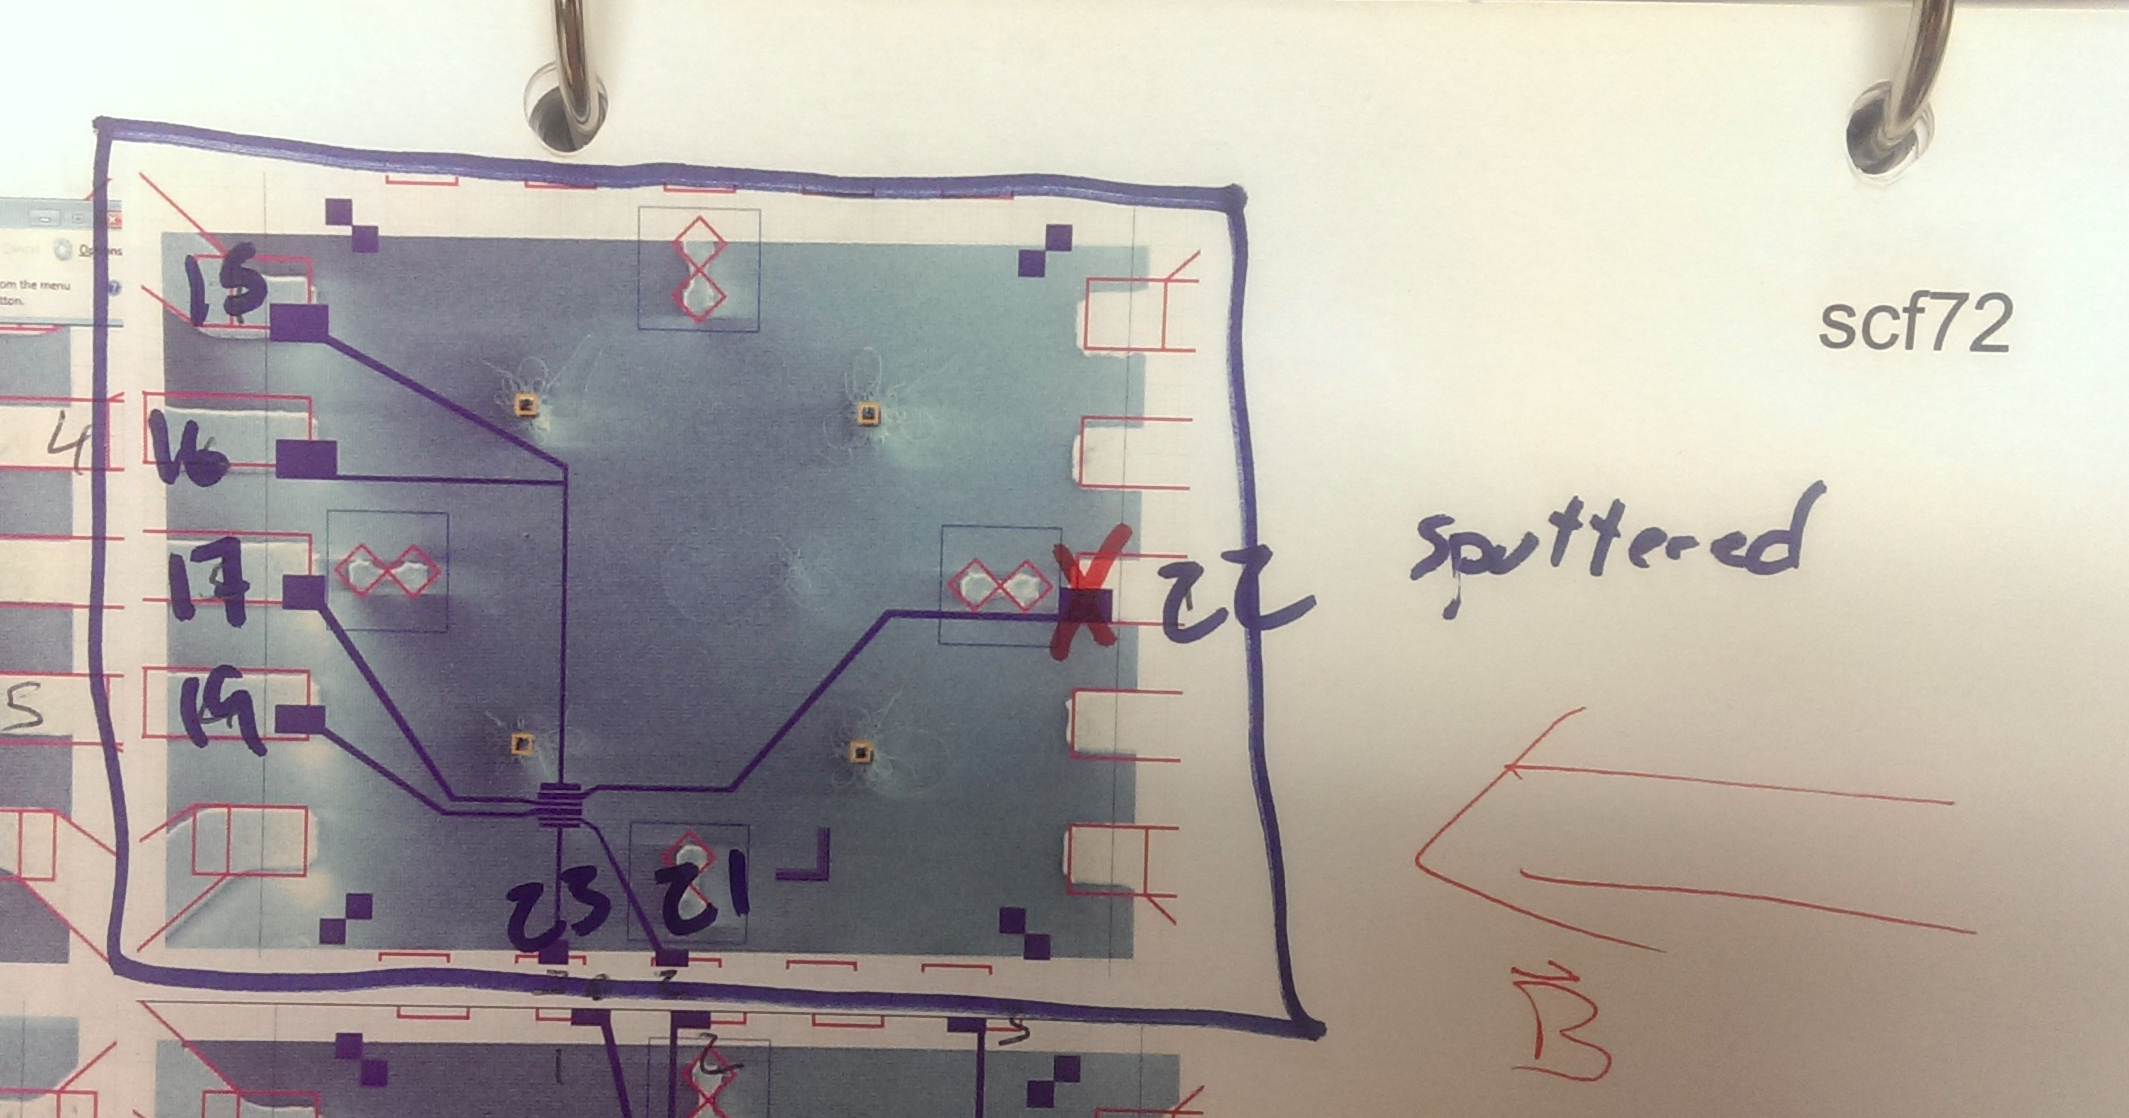

In [194]:
from IPython.display import Image 

fig_dir =  '/Volumes/JUPITER/Data/SCF72/figures/'
Image(filename=os.path.join(fig_dir,'scf72_q1.png'))

In [5]:
rt_dir = '/Volumes/JUPITER/Data/SCF72/room_temp/'
cold_dir = '/Volumes/JUPITER/Data/SCF72/4K/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

###23-21

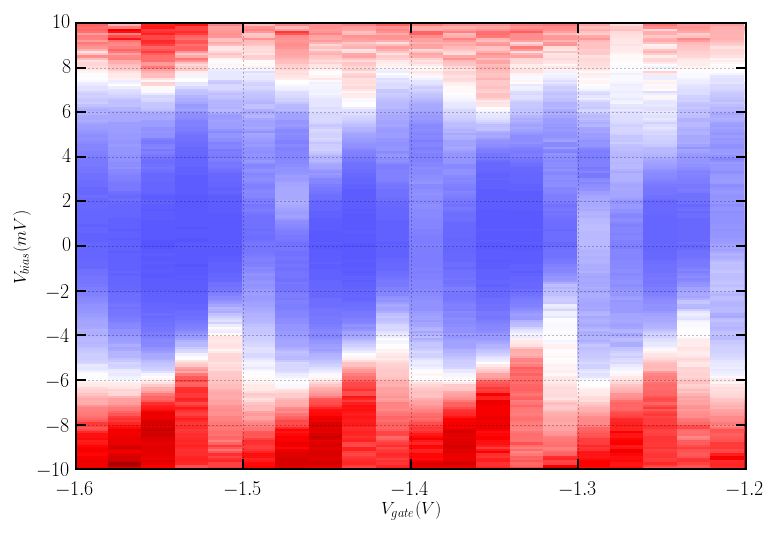

In [196]:
f = os.path.join(cold_dir,'VI-gate_23-21_13_f.bin')

data = np.fromfile(f,'>d')
data = data.reshape((-1, data[0]))
data = data.byteswap().newbyteorder()
data = data.transpose()
df = pd.DataFrame(data[1:, 1:], index=data[1:, 0], columns=data[0, 1:])
df.columns.name = 'gate'
df.index.name = 'bias'
df.index = df.index*1000
df = df.groupby(df.index).mean()
cond = get_dIdV(df, 100e-6)/3.875e-5

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.4, vmax = 0.8, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_{gate} (V)$')
ax.set_ylabel(r'$V_{bias} (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(-1.6,-1.2)
# ax.set_ylim(-30,30)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.grid()

fig.savefig(os.path.join(thesis_dir, 'scf72_23-21_cond_calc.png'), dpi=300)

###17-19

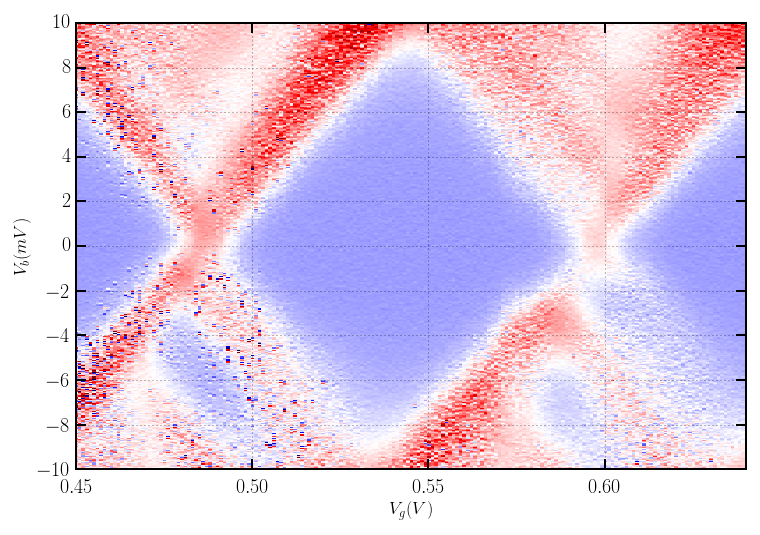

In [8]:
f = os.path.join(cold_dir,'VI-gate_17-19_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
cond = get_dIdV(df, 50e-6)/3.875e-5

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(0.45,0.64)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.grid()

# fig.savefig(os.path.join(thesis_dir, 'scf72_17-19_cond_calc.png'), dpi=300)

0.005 0.0


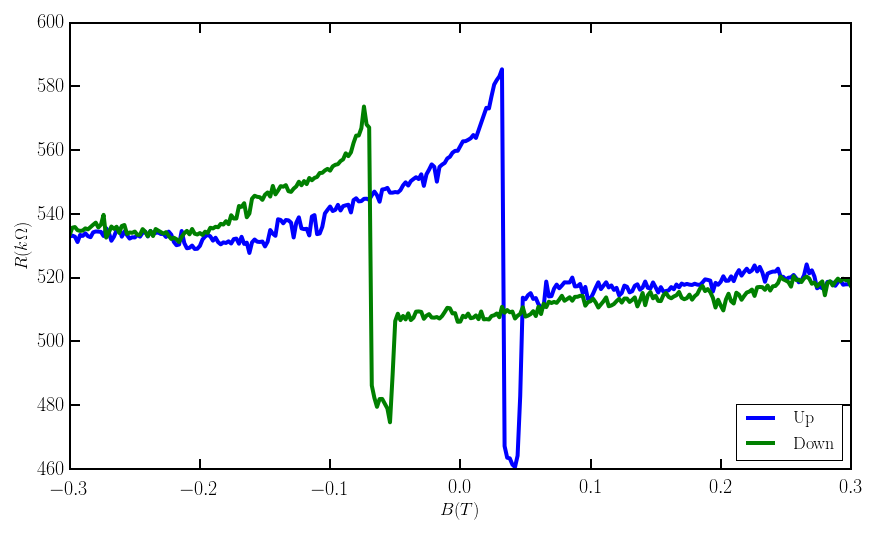

In [6]:
f = os.path.join(cold_dir, 'BI_17-19_13_e.bin')

f = os.path.join(cold_dir, 'BI_17-19_13_e.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
ind = lvdt.split_sweeps(df, 'Field')

print bias, gate

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(df['Field'][0:501], bias/df['Iavg'][0:501]/1000, label='Up')
ax.plot(df['Field'][501:1002], bias/df['Iavg'][501:1002]/1000, label='Down')
ax.set_xlim(-0.3, 0.3)
ax.set_xlabel(r'$B (T)$')
ax.set_ylabel(r'$R (k\Omega)$')
ax.legend(loc='lower right')

# fig.savefig(os.path.join(thesis_dir, 'scf72_17-19_bsweep_e_4K.pdf'))

#SCF75

Dots are designed to be 300nm each. Sputtered Co. Etched Mo on substrate. IPA/H2O developer.

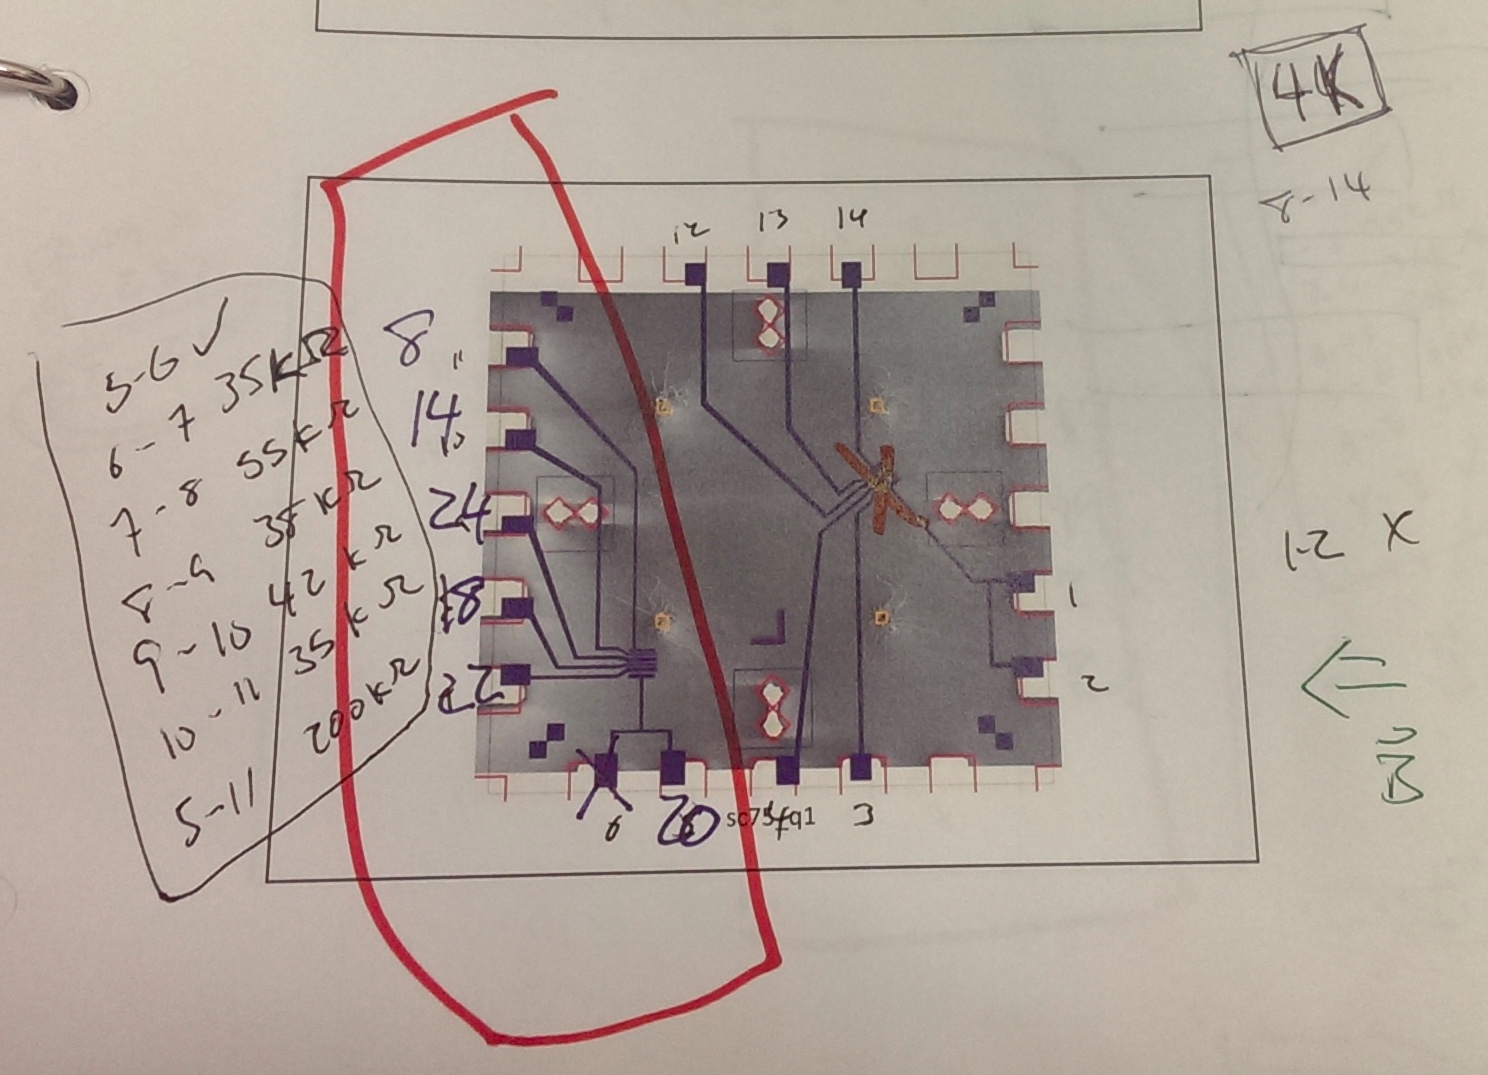

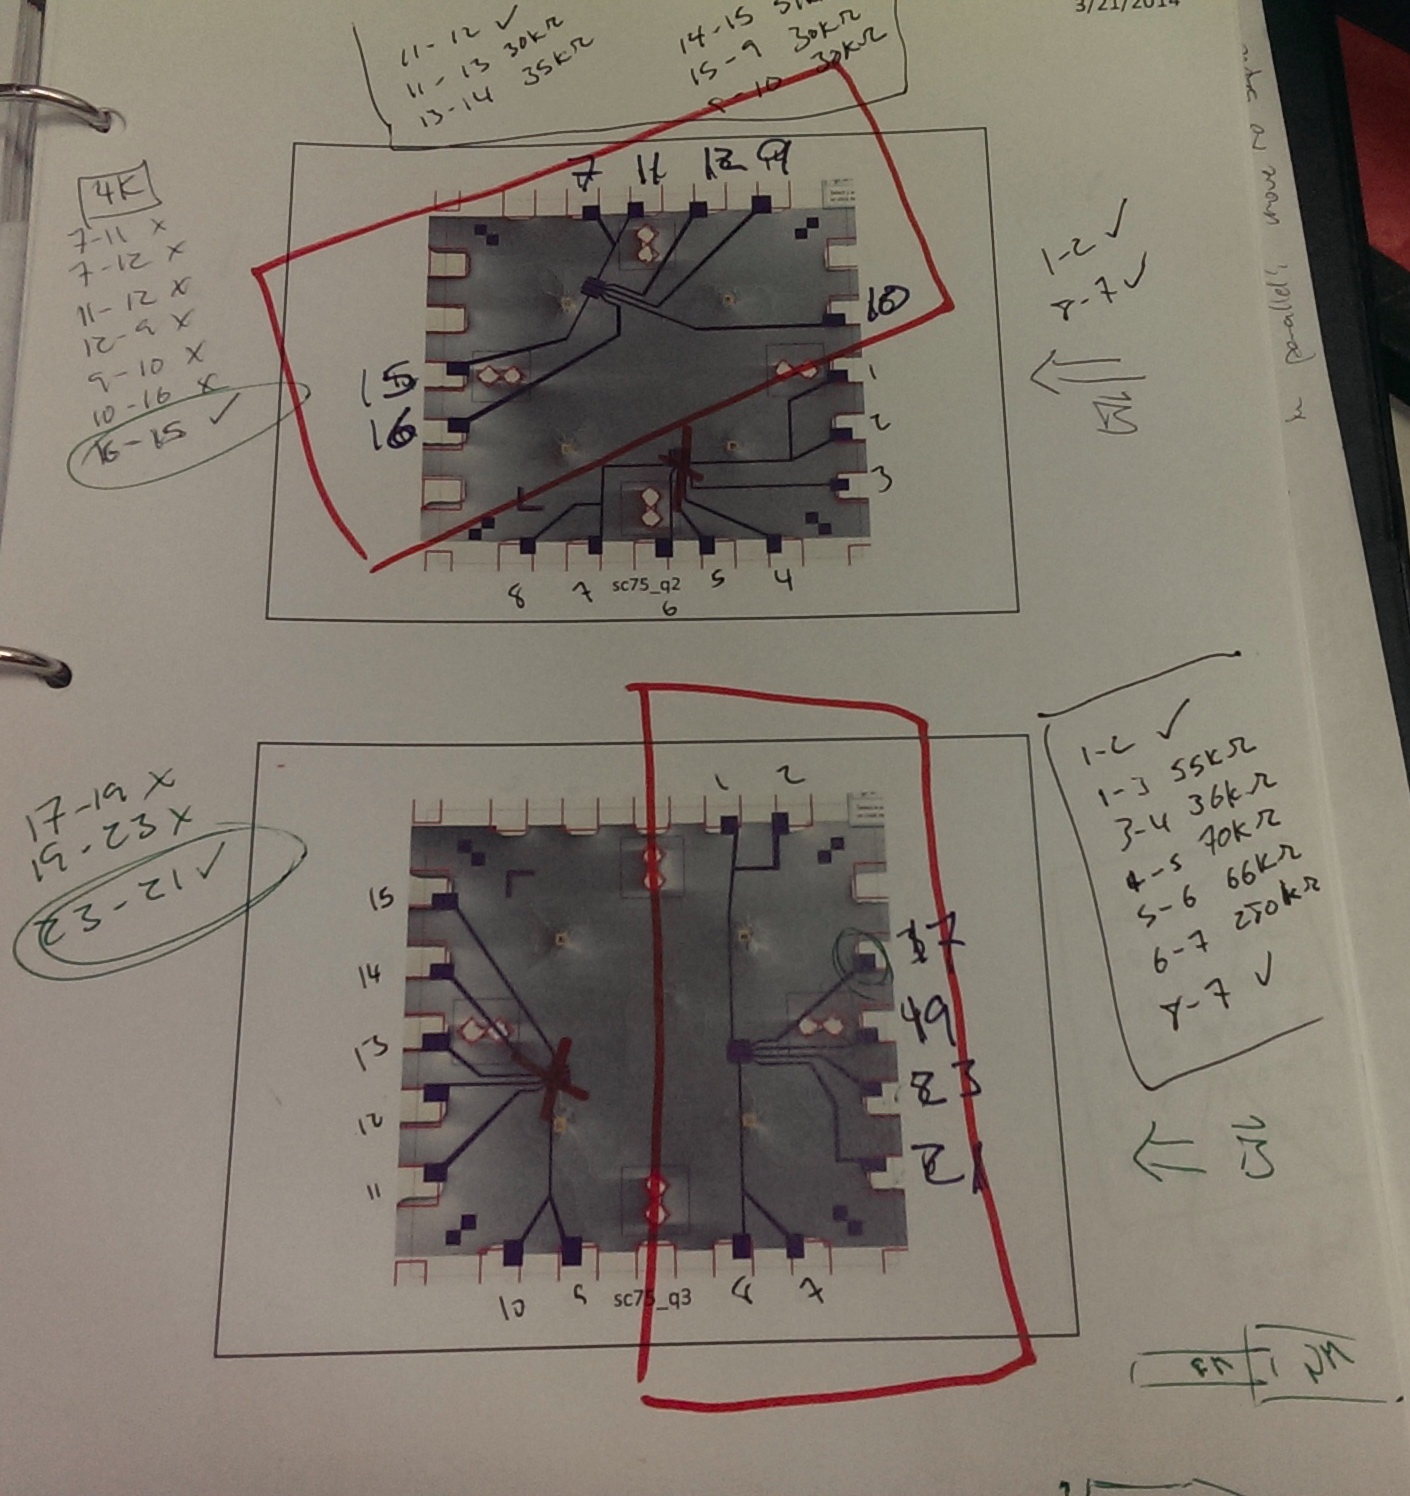

In [176]:
fig_dir = '/Volumes/JUPITER/Data/SCF75/figures/'
from IPython.display import display, Image

display(Image(os.path.join(fig_dir, 'scf75_1.jpg')))
display(Image(os.path.join(fig_dir, 'scf75_2.jpg')))

In [177]:
cold_dir = '/Volumes/JUPITER/Data/SCF75/4K/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

### 21-23

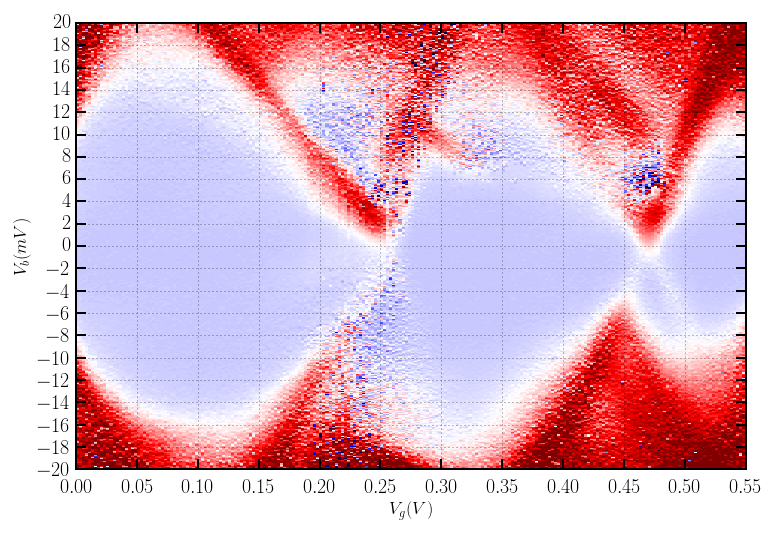

In [178]:
f = os.path.join(cold_dir,'VI-gate_21-23_13_a.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.4, vmax=0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(0.0,0.55)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.grid()

fig.savefig(os.path.join(thesis_dir, 'scf75_21-23_cond_calc.png'), dpi=300)

###15-16

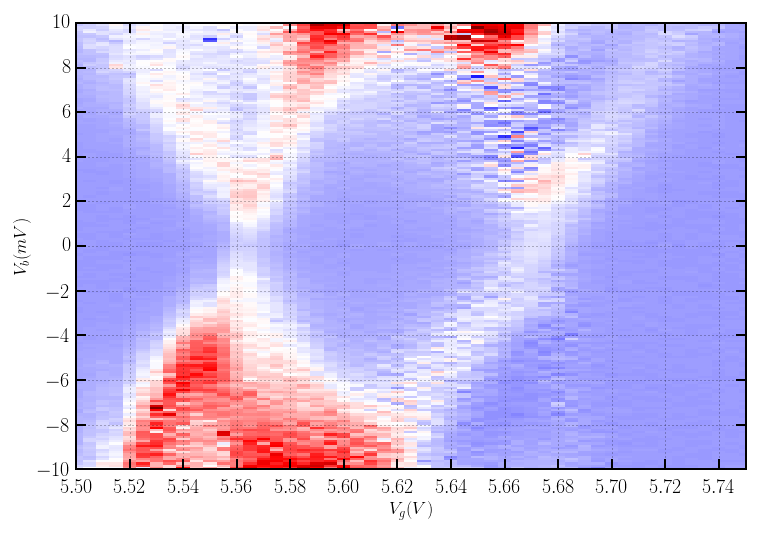

In [179]:
f = os.path.join(cold_dir,'VI-gate_15-16_13_b.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.3, vmax=0.45, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(5.5,5.75)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax.grid()

fig.savefig(os.path.join(thesis_dir, 'scf75_15-16_cond_calc.png'), dpi=300)

###15-16 (2)

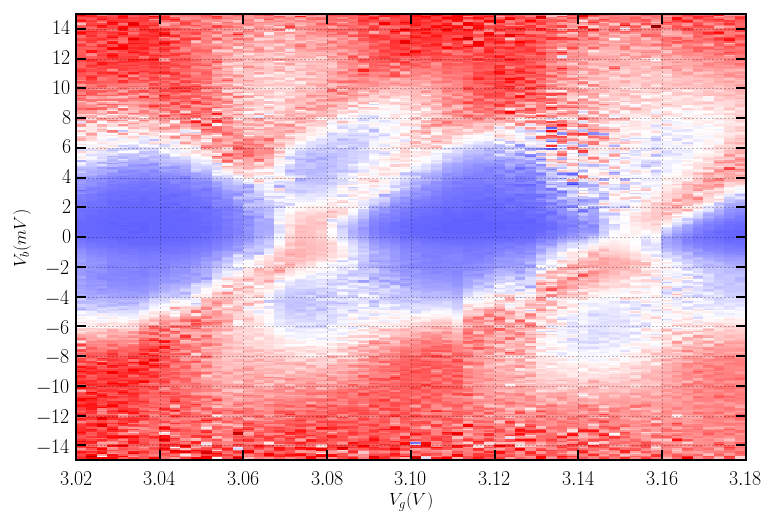

In [180]:
f = os.path.join(cold_dir,'VI-gate_15-16_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]
         
cond = get_dIdV(df, 100e-6)/3.875e-5
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.6, vmax=1.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(3.02,3.18)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax.grid()

fig.savefig(os.path.join(thesis_dir, 'scf75_15-16-2_cond_calc.png'), dpi=300)

#SCF96

Dots are designed to be 300nm each. Ebeam evaporated Co. Etched Mo on substrate. IPA/H2O developer.

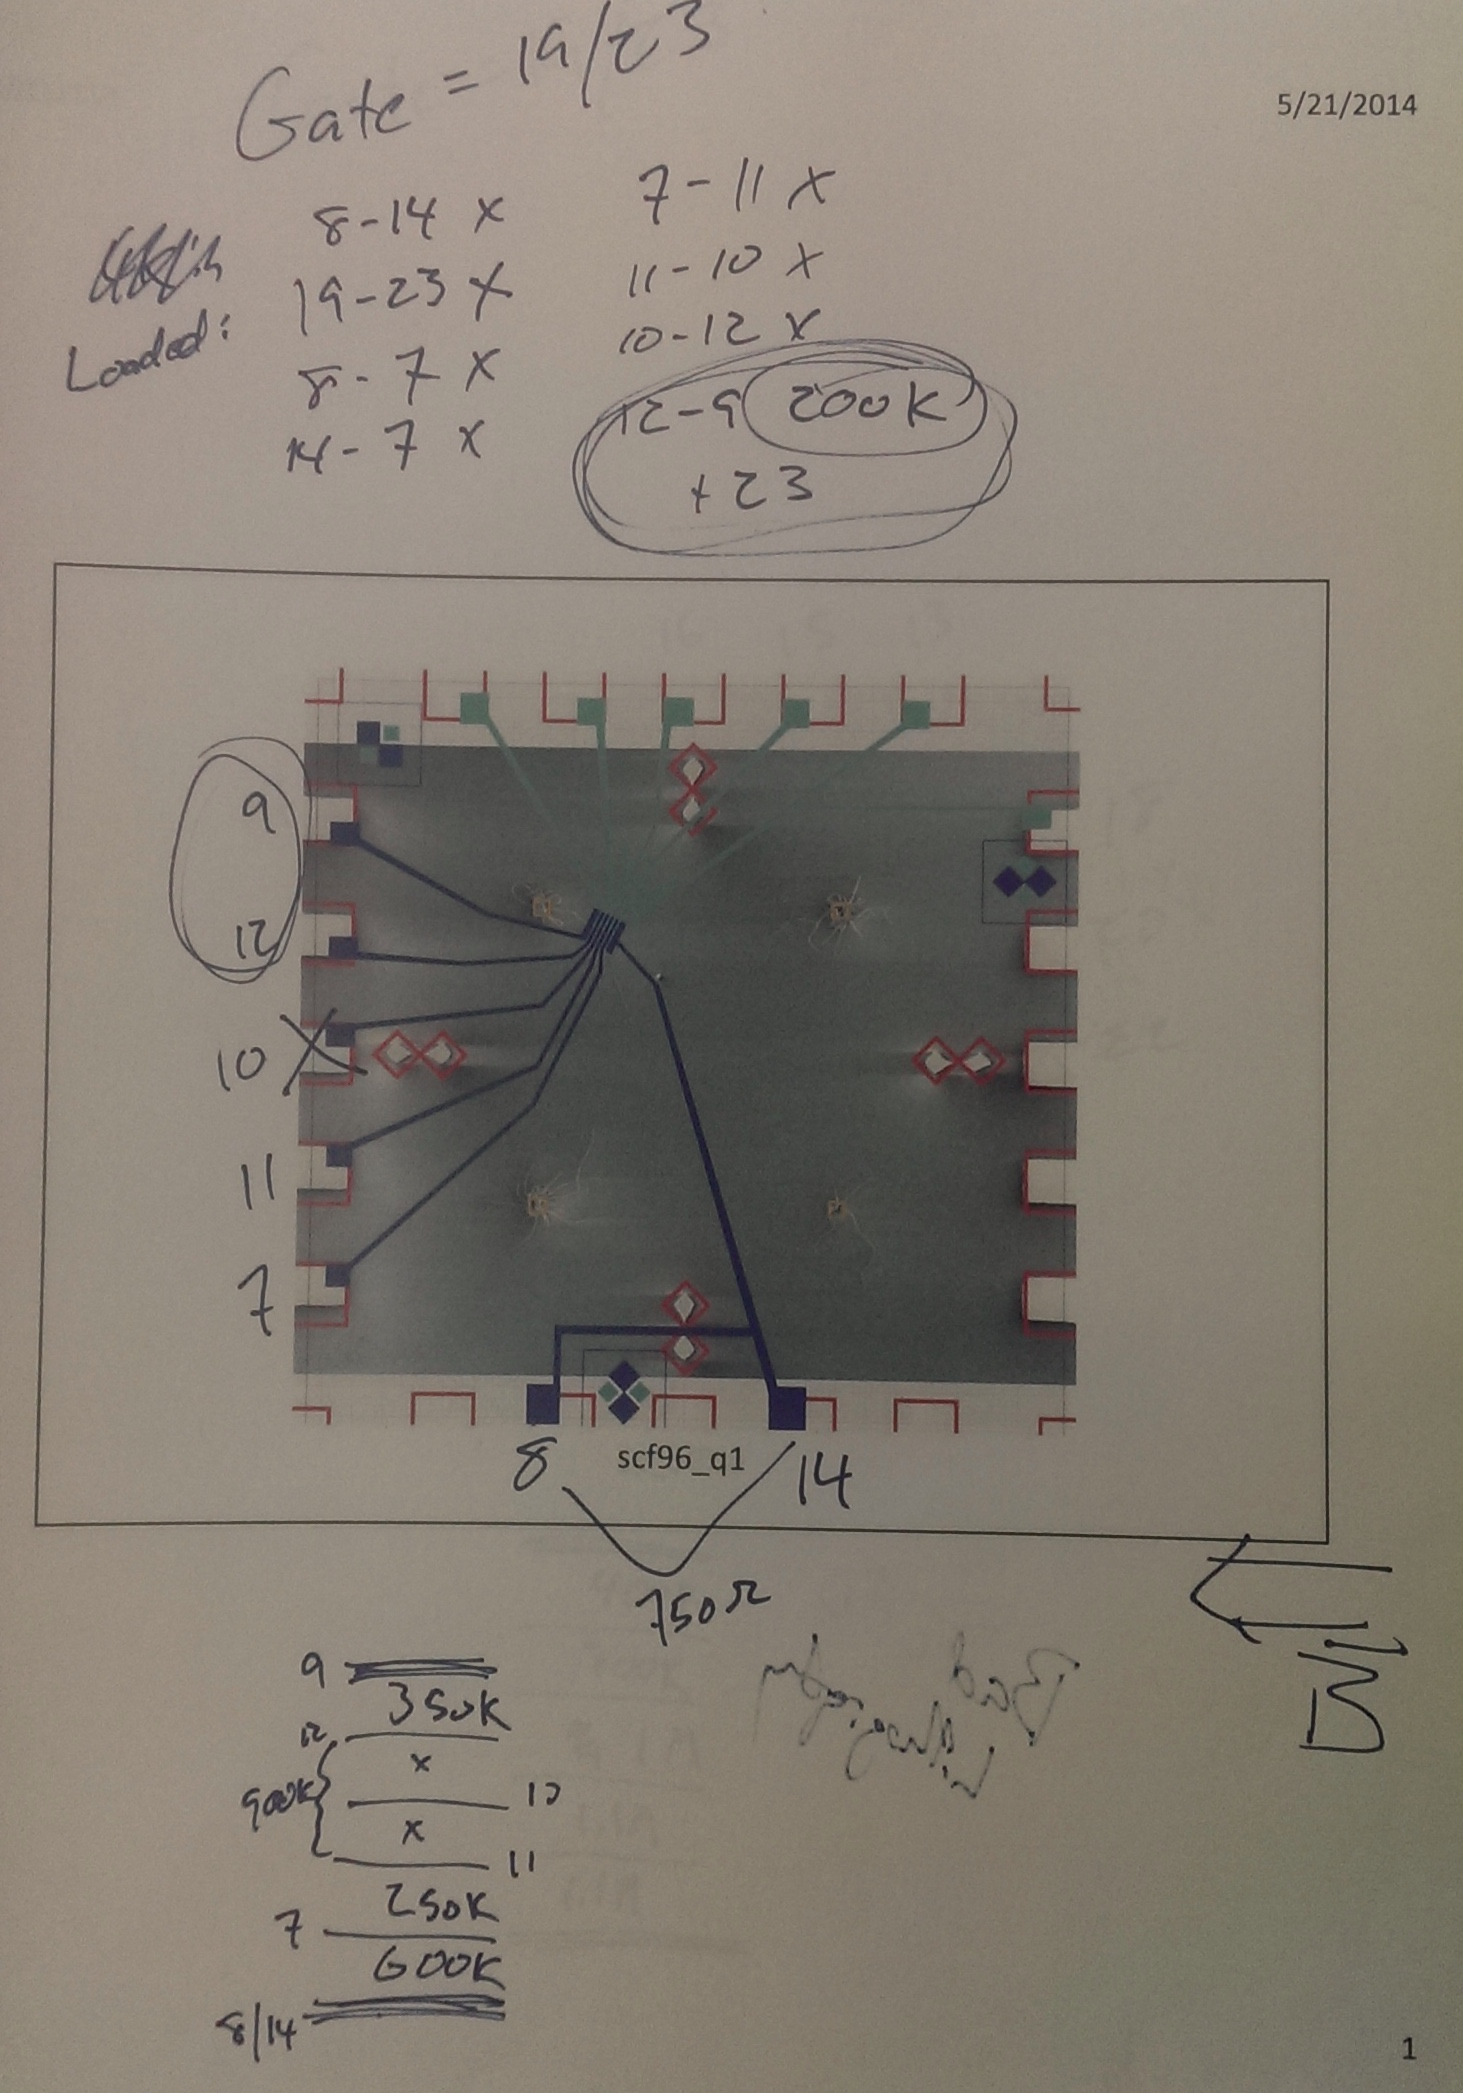

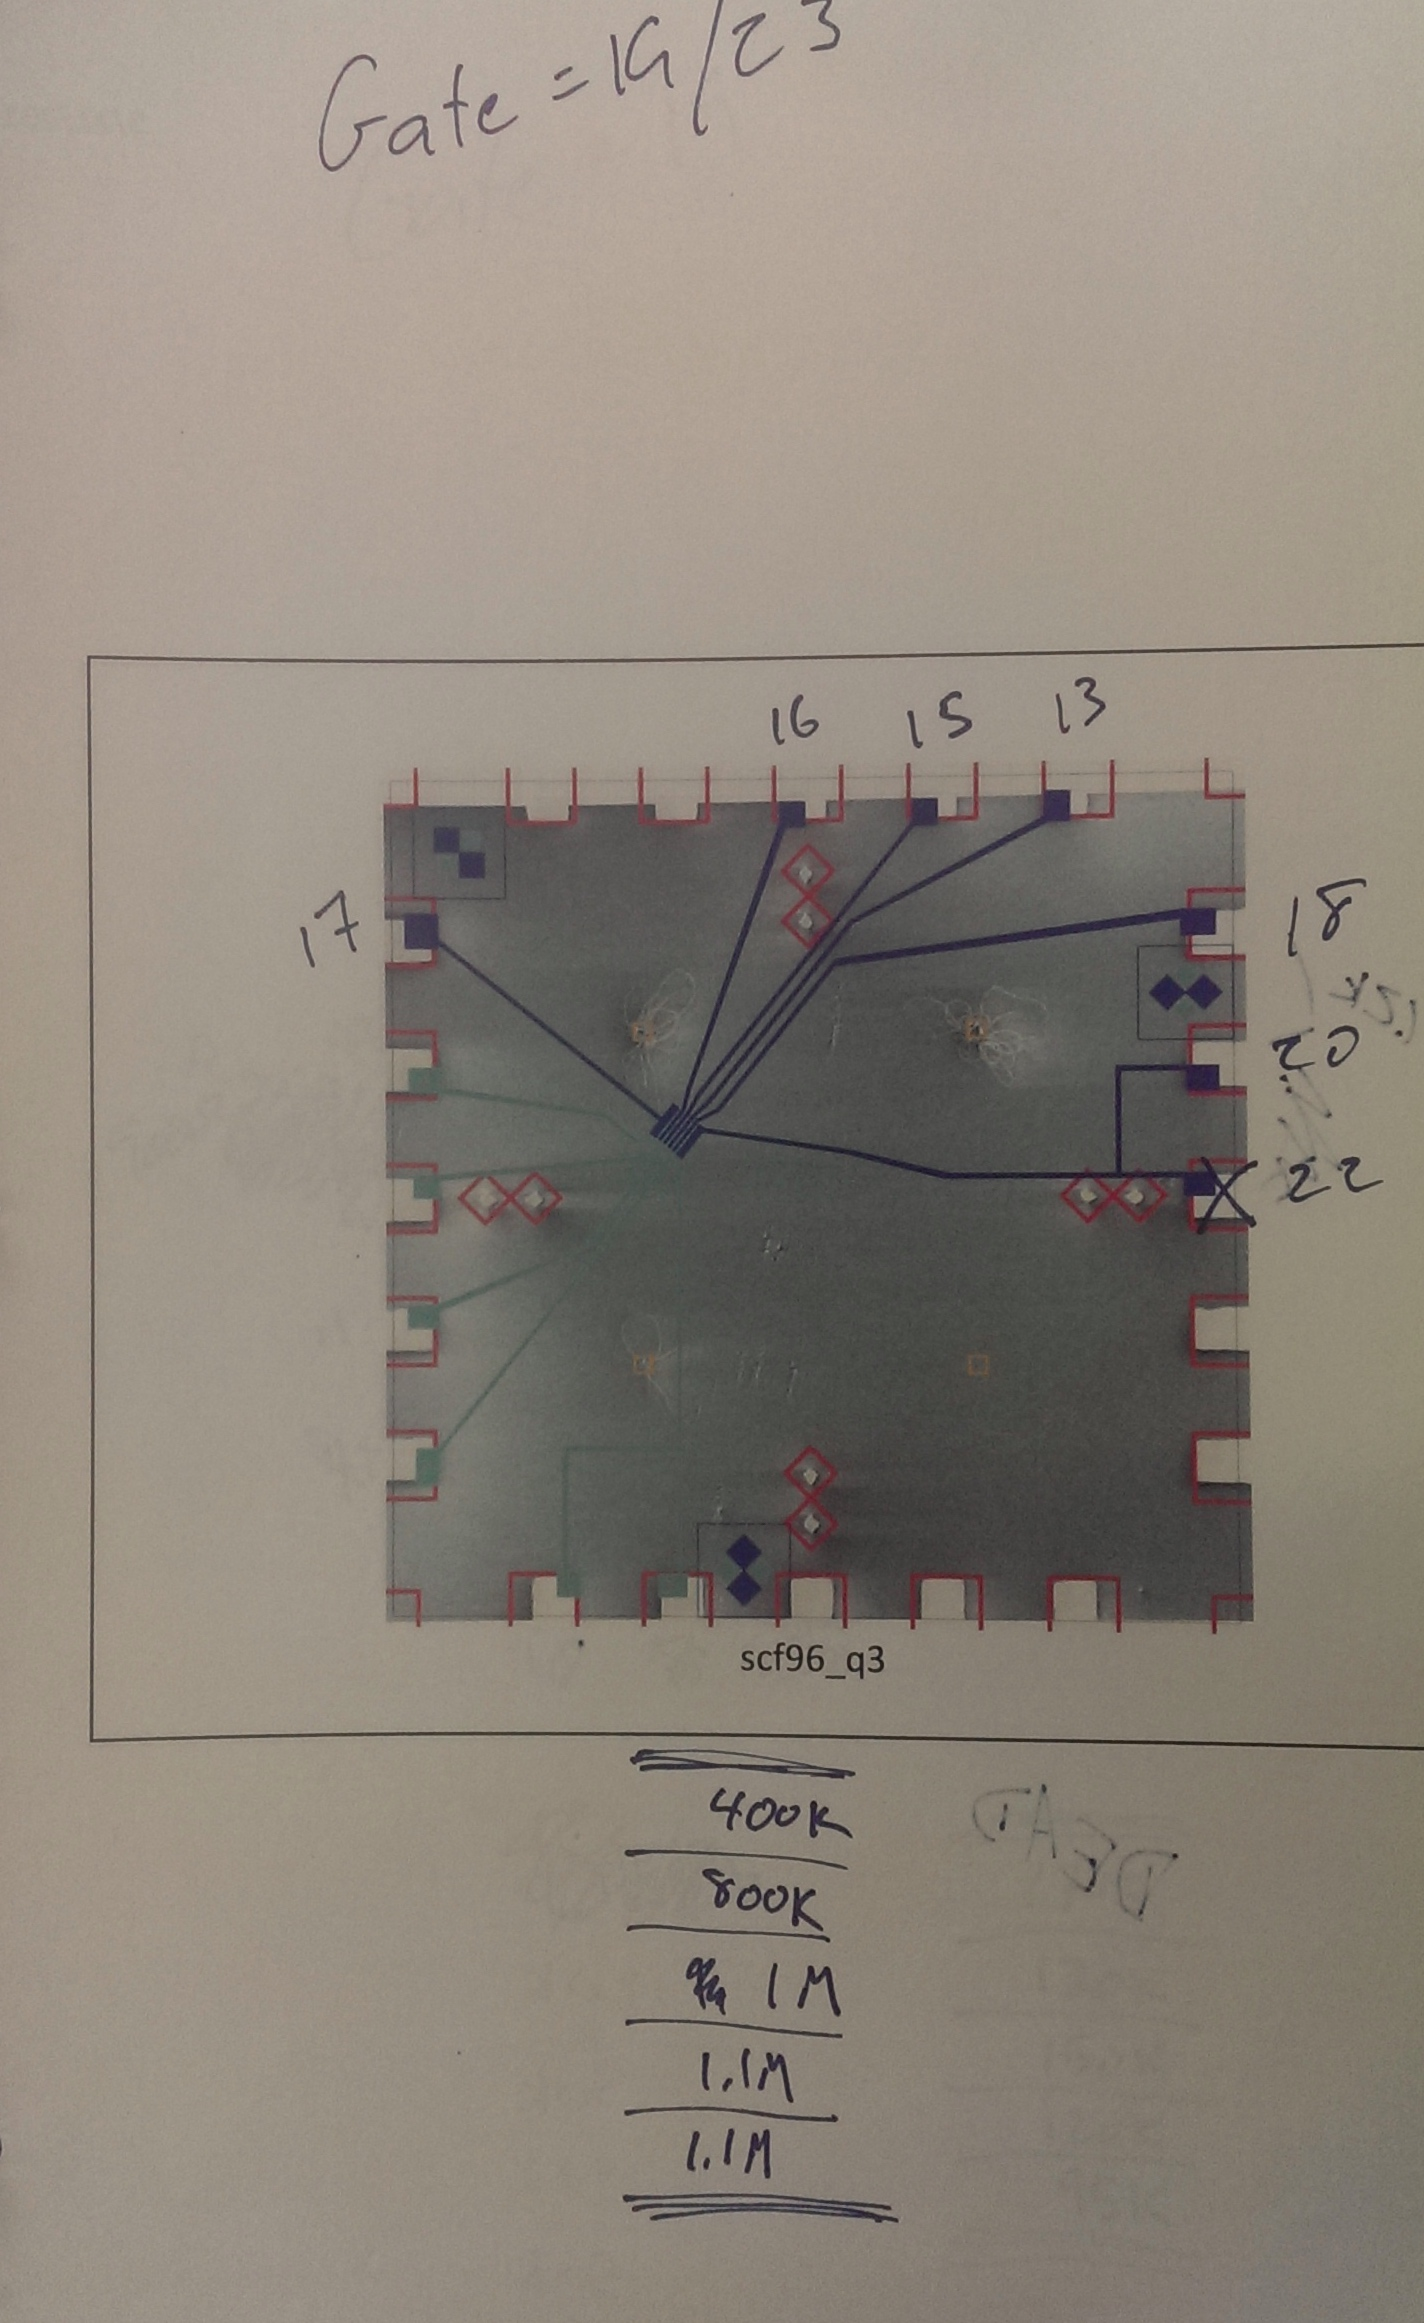

In [181]:
from IPython.display import display, Image

fig_dir = '/Volumes/JUPITER/Data/SCF96/figures/'
display(Image(os.path.join(fig_dir, 'scf96_q1.jpg')))
display(Image(os.path.join(fig_dir, 'scf96_q3.jpg')))

In [182]:
cold_dir = '/Volumes/JUPITER/Data/SCF96/q1/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

###9-12

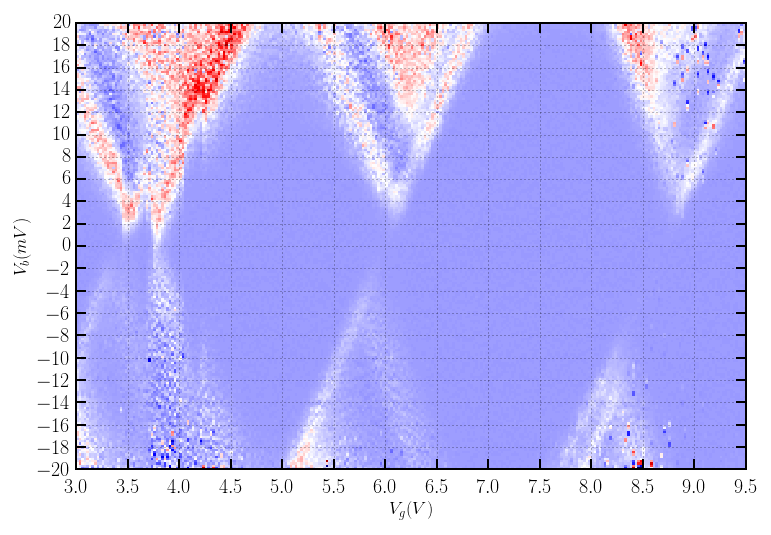

In [183]:
f = os.path.join(cold_dir, 'vi-gate_9-12_23_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 200e-6)/3.875e-5
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(3.0,9.5)
# ax.set_ylim(-30,30)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.grid()
fig.savefig(os.path.join(thesis_dir, 'scf96_9-12_cond_calc.png'), dpi=300)

In [1]:
cold_dir = '/Volumes/JUPITER/Data/SCF96/q3/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

###16-17

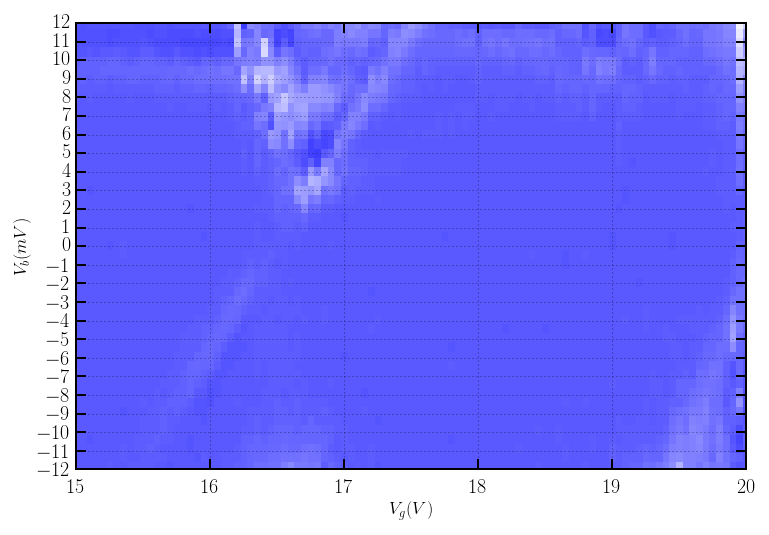

In [11]:
f = os.path.join(cold_dir, 'vi-gate_16-17_23_a.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 500e-6)/3.875e-5
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(15,20.0)
ax.set_ylim(-12,12)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.grid()

# fig.savefig(os.path.join(thesis_dir, 'scf96_16-17_cond_calc.png'), dpi=300)

# SCF98

Dots are designed to be 300nm each. Ebeam evaporated Co. Etched Mo on substrate. IPA/H2O developer.

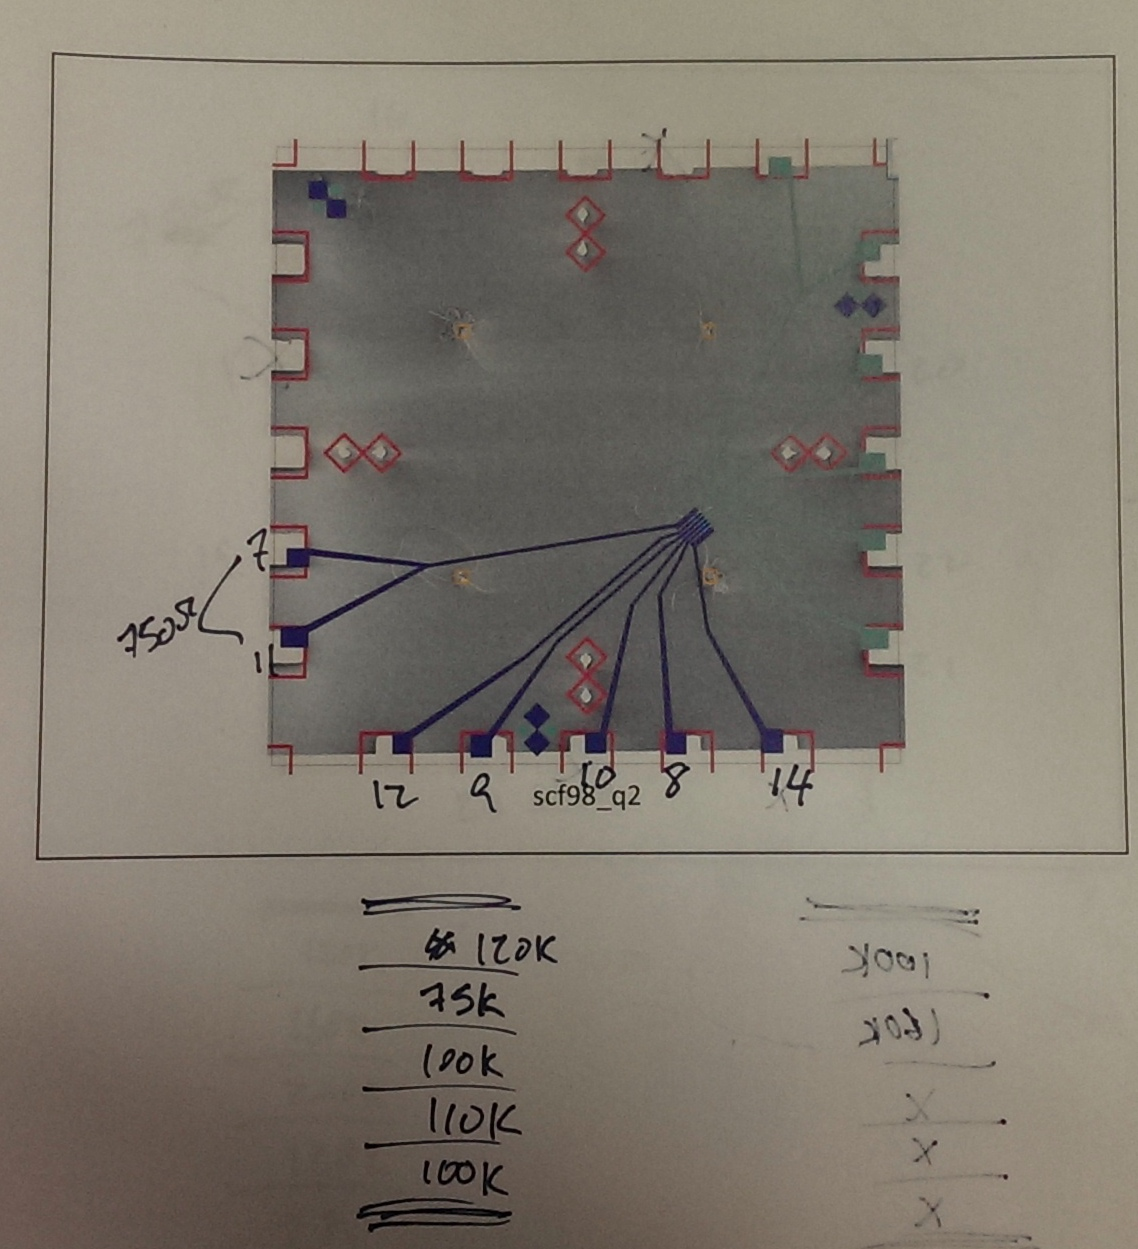

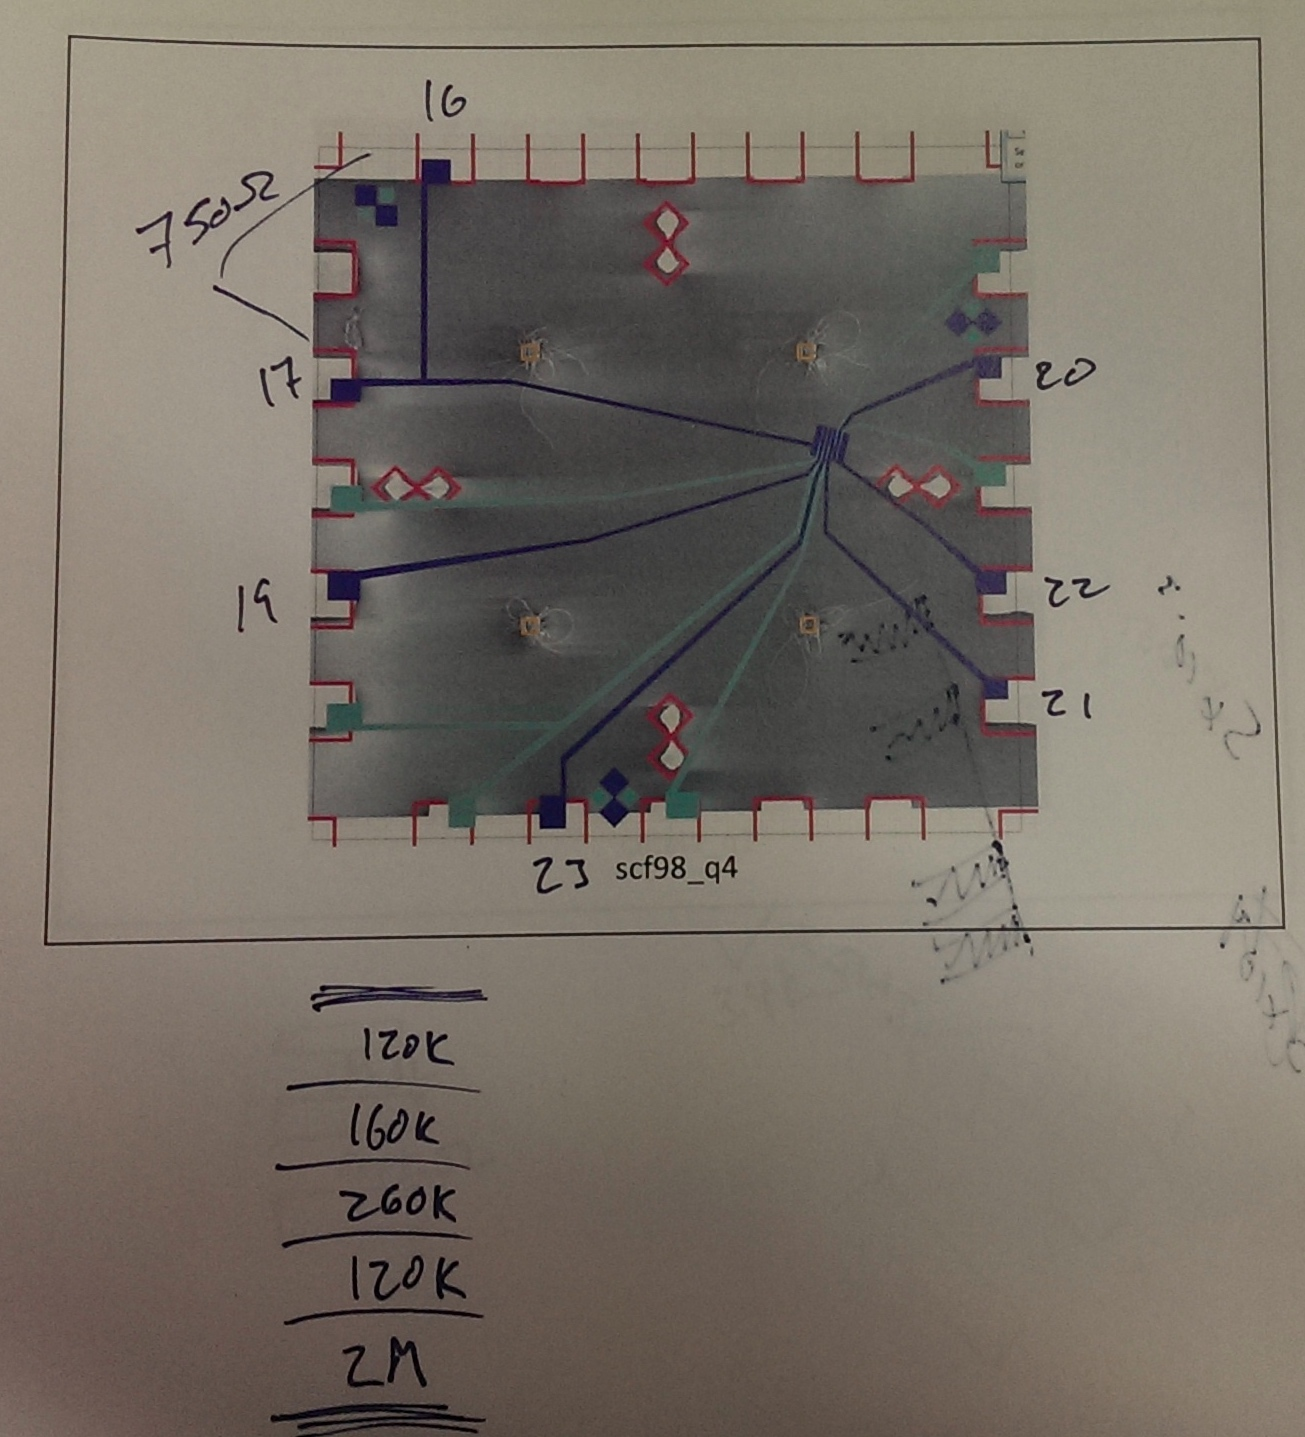

In [186]:
fig_dir = '/Volumes/JUPITER/Data/SCF98/figures/'
from IPython.display import display, Image

display(Image(os.path.join(fig_dir, 'scf98_q2.jpg')))
display(Image(os.path.join(fig_dir, 'scf98_q4.jpg')))

In [187]:
cold_dir = '/Volumes/JUPITER/Data/SCF98/q2/150mK/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/fmdots/'

###11-12

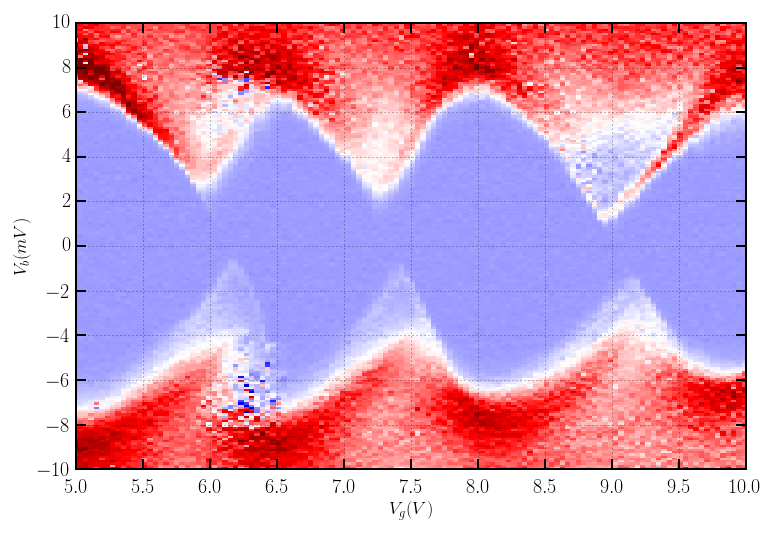

In [189]:
f = os.path.join(cold_dir, 'vi-gate_11-12_23_i.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
# print df.index[0:5]

cond = get_dIdV(df, 80e-6)/3.875e-5
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax.set_xlim(5,10)
# ax.set_ylim(-30,30)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.grid()

fig.savefig(os.path.join(thesis_dir, 'scf98_11-12_cond_calc.png'))

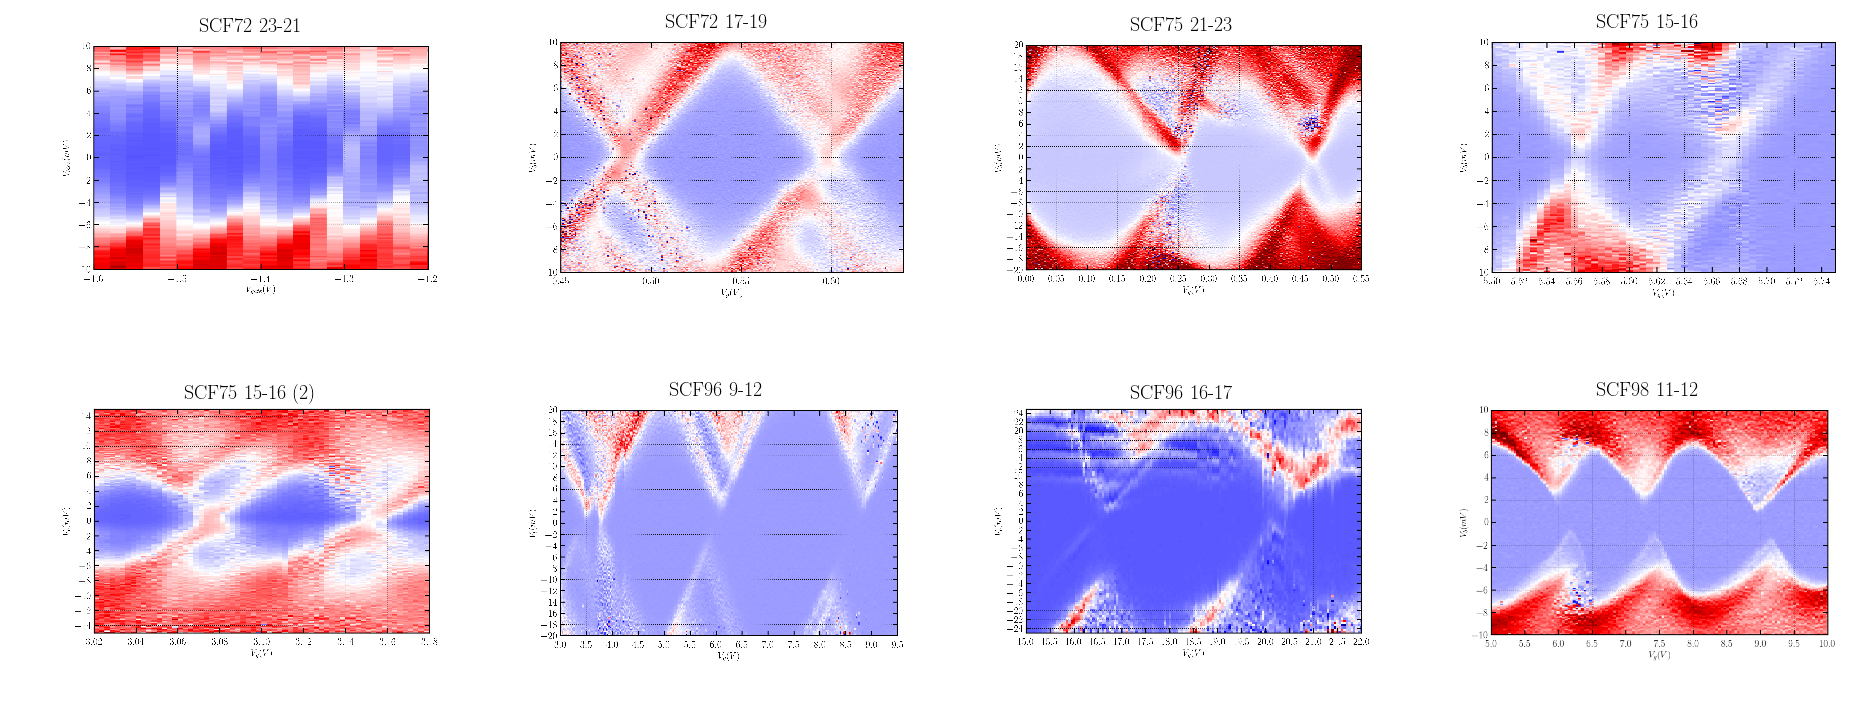

In [190]:
import matplotlib.image as mpimg

filelist = ['scf72_23-21_cond_calc.png', 'scf72_17-19_cond_calc.png', 
            'scf75_21-23_cond_calc.png', 'scf75_15-16_cond_calc.png',
            'scf75_15-16-2_cond_calc.png', 'scf96_9-12_cond_calc.png', 
            'scf96_16-17_cond_calc.png', 'scf98_11-12_cond_calc.png']
titles = ['SCF72 23-21', 'SCF72 17-19', 
          'SCF75 21-23', 'SCF75 15-16', 
          'SCF75 15-16 (2)', 'SCF96 9-12', 
          'SCF96 16-17', 'SCF98 11-12']

fig, ax = plt.subplots(2,4, figsize = (32,12))
axes = ax.flatten()

for i, f in enumerate(filelist):
    im = mpimg.imread(os.path.join(thesis_dir,f))
    axes[i].imshow(im)
    axes[i].set_title(titles[i])
    axes[i].set_axis_off()
    
fig.savefig(os.path.join(thesis_dir, 'all_fm_dots'), dpi=300)